# Handwritten Digit Recognition / Classification

Data Source: http://yann.lecun.com/exdb/mnist/

In this project, we identify handwritten digit(s) from a collection of 70000 images used for training and validation. 
- The images are monochrome graphics. 
- We initially apply a simple neural network model to baseline
- Apply convolution, pooling and dropout to see performance improvement
- Increase the number of layers to see if performance improves

We apply
- convolution to capture patterns
- pooling to reduce the size of image
- dropout to generalize model

Image Augmentation:

In addition to above, we can also try Image augmentation techniques to capture the structure and patterns. It is a technique applied when input data is not sufficient enough to capture patterns. Following are few techniques we apply:
- 0) original digits before applying any augmentation:
<img src='Data/original_digits.png' width=300/>

- 1) Feature standardization: is similar to sample standardization, which standardizes across features; feature standardization standardizes values for each feature
<img src='Data/feat_std_digits.png' width=300/>

- 2) ZCA: reduces redundancy applying linear algebra; 
    - reduction in redundancy highlights the structure and features of the images; 
    - is similar to PCA (which discards irrelevant features) but unlike PCA includes all features
<img src='Data/zca_whitened_digits.png' width=300/>
- 3) Apply Random Rotations
- 4) Apply Random Shifts
- 5) Apply Random Flips

In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

__Load and Visualize data__

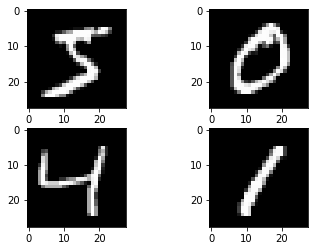

In [2]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.show()

In [3]:
X_train.shape

(60000, 28, 28)

So, there are __60000 images__ in training data set of size __28 x 28 x 1__ (length, width, color).

In [4]:
X_valid.shape

(10000, 28, 28)

So, there are __10000 images__ in validate data set of size __28 x 28 x 1__ (length, width, color).

__Baseline model__

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

<img src='Data/Baseline_model.png' width=750/>

In [6]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_valid = X_valid.reshape((X_valid.shape[0], num_pixels)).astype('float32')

# Normalize intensitiy values ranging (0 - 255) to get values between (0 - 1)
X_train = X_train / 255
X_valid = X_valid / 255

y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
num_classes = y_valid.shape[1]

# We flatten 28 x 28 x 1 to vector of 784 pixel input
def baseline_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = baseline_model()
model.summary()

model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=200, verbose=2)

scores = model.evaluate(X_valid, y_valid, verbose=0)
print('Baseline Error = %.2f%%' % (100 - scores[1] * 100))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 - 4s - loss: 0.2768 - accuracy: 0.9209 - val_loss: 0.1321 - val_accuracy: 0.9621
Epoch 2/10
60000/60000 - 3s - loss: 0.1092 - accuracy: 0.9683 - val_loss: 0.0924 - val_accuracy: 0.9709
Epoch 3/10
60000/60000 - 3s - loss: 0.0703 - accuracy: 0.9796 - val_loss: 0.0740 - val_accuracy: 0.9775
Epoch 4/10
60000/60000 - 3s - loss: 0.0497 - accuracy: 0.9857 - val_loss: 0.0680 - val_accuracy: 0.9791
Epoch 5/10
60000/60000 - 3s - loss: 0.0365 - a

__Apply Convolutions, Pooling and Dropout Layers__

In [7]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_valid = X_valid.reshape(X_valid.shape[0], 28, 28, 1).astype('float32')

# Normalize inputs from 0 - 255 to 0 - 1
X_train = X_train / 255
X_valid = X_valid / 255

# one hot encode output
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)

In [8]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten

def simpleCNN_model():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [9]:
model = simpleCNN_model()
model.summary()

model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=200, verbose=2)

scores = model.evaluate(X_valid, y_valid, verbose=0)
print('Simple CNN model Error = %.2f%%' % (100-scores[1]*100))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
________________________________________________

__Apply larger Convolutional neural network__

In [10]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_valid = X_valid.reshape(X_valid.shape[0], 28, 28, 1).astype('float32')

# Normalize inputs from 0 - 255 to 0 - 1
X_train = X_train / 255
X_valid = X_valid / 255

# one hot encode output
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)

In [11]:
def larger_model():
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = larger_model()
model.summary()

model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=200)

scores = model.evaluate(X_valid, y_valid, verbose=0)
print('Larger CNN model Error = %.2f%%' % (100-scores[1]*100))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 30)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4320)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               553088    
_________________________________________________________________
dense_5 (Dense)              (None, 50)                6450      
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

<font color=red>__Image Augmentation Techniques__</font>
- View Images before any augmentation to have an idea which transformations can benefit
- Apply feature transformation
- Apply ZCA
- Apply Random Rotations
- Apply Random Shifts
- Apply Random Flips

By looking at the images before any of the transformations, we will have an idea which transformations can be useful to apply. After each transformation check the metrics.

__Let us view first 9 digits in their original form__:

Digits in original form:


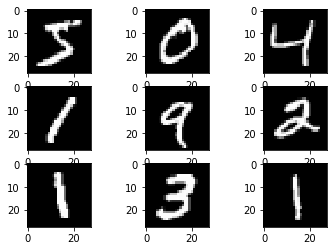

In [2]:
# load data
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

# create a grid of 3x3 images
print('Digits in original form:')
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    # show the plot
plt.show()

__Images after feature transformation__:

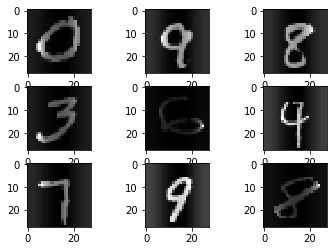

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as bknd

bknd.set_image_data_format('channels_last') 

# load data
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

X_train = X_train.reshape((X_train.shape[0], 1, 28, 28))
X_valid = X_valid.reshape((X_valid.shape[0], 1, 28, 28))

X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')

datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size = 9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    plt.show()
    break

__ZCA (Zero Component Analysis) Whitening__

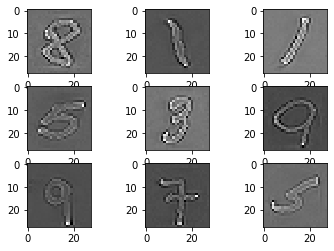

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# load data
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_valid = X_valid.reshape((X_valid.shape[0], 28, 28, 1))

X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')

datagen = ImageDataGenerator(zca_whitening=True, 
                             featurewise_center=False, featurewise_std_normalization=False)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size = 9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    plt.show()
    break

__Apply Random Rotations__

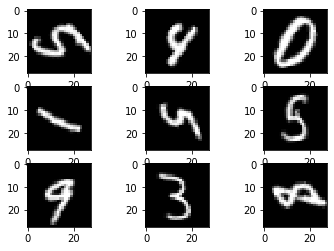

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# load data
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_valid = X_valid.reshape((X_valid.shape[0], 28, 28, 1))

X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')

datagen = ImageDataGenerator(rotation_range=90, 
                             zca_whitening=False, 
                             featurewise_center=False, featurewise_std_normalization=False)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size = 9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    plt.show()
    break

__Apply Random Shifts__

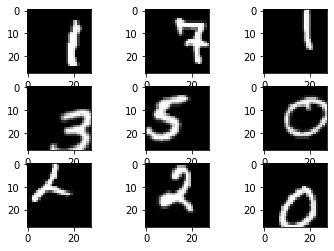

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# load data
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_valid = X_valid.reshape((X_valid.shape[0], 28, 28, 1))

X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')

shift = 0.25
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift, 
                             rotation_range=0, zca_whitening=False, 
                             featurewise_center=False, featurewise_std_normalization=False)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size = 9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    plt.show()
    break

__Apply Random Flips__

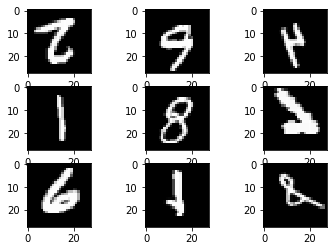

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# load data
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_valid = X_valid.reshape((X_valid.shape[0], 28, 28, 1))

X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')

datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True,
                             width_shift_range=0, height_shift_range=0, 
                             rotation_range=0, zca_whitening=False, 
                             featurewise_center=False, featurewise_std_normalization=False)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size = 9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    plt.show()
    break

__Saving Augmented images to File__

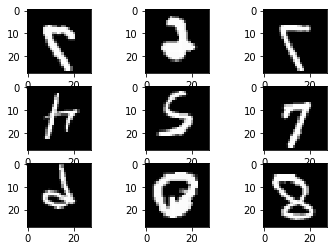

In [47]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# load data
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_valid = X_valid.reshape((X_valid.shape[0], 28, 28, 1))

X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')

if not os.path.exists('Data/images'):
    os.makedirs('Data/images')

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size = 9, 
                                     save_to_dir='Data/images', save_prefix='aug', save_format='png'):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    plt.show()
    break